In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the date range
start = '2024-01-01'
end = '2025-01-10'

# Download the data
df = yf.download('^NSEI', start=start, end=end)

# Display the first few rows
print(df.head())

/var/folders/j_/n8jnc2l10j9fyjjkkhgsr7j40000gn/T/ipykernel_7086/695287254.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('^NSEI', start=start, end=end)
[*********************100%***********************]  1 of 1 completed

Price              Close          High           Low          Open  Volume
Ticker             ^NSEI         ^NSEI         ^NSEI         ^NSEI   ^NSEI
Date                                                                      
2024-01-01  21741.900391  21834.349609  21680.849609  21727.750000  154000
2024-01-02  21665.800781  21755.599609  21555.650391  21751.349609  263700
2024-01-03  21517.349609  21677.000000  21500.349609  21661.099609  311900
2024-01-04  21658.599609  21685.650391  21564.550781  21605.800781  339200
2024-01-05  21710.800781  21749.599609  21629.199219  21705.750000  309300


In [2]:
df=df.reset_index()

In [3]:
columns_to_drop = [col for col in ['Date', 'Adj Close'] if col in df.columns]
df = df.drop(columns=columns_to_drop, axis=1)
print(df.head())


Price          Close          High           Low          Open  Volume
Ticker         ^NSEI         ^NSEI         ^NSEI         ^NSEI   ^NSEI
0       21741.900391  21834.349609  21680.849609  21727.750000  154000
1       21665.800781  21755.599609  21555.650391  21751.349609  263700
2       21517.349609  21677.000000  21500.349609  21661.099609  311900
3       21658.599609  21685.650391  21564.550781  21605.800781  339200
4       21710.800781  21749.599609  21629.199219  21705.750000  309300


/var/folders/j_/n8jnc2l10j9fyjjkkhgsr7j40000gn/T/ipykernel_7086/1146852703.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(columns=columns_to_drop, axis=1)


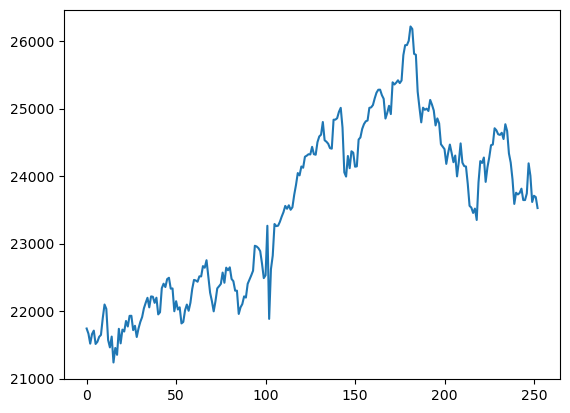

In [4]:
plt.plot(df.Close)

In [5]:
df

Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
0,21741.900391,21834.349609,21680.849609,21727.750000,154000
1,21665.800781,21755.599609,21555.650391,21751.349609,263700
2,21517.349609,21677.000000,21500.349609,21661.099609,311900
3,21658.599609,21685.650391,21564.550781,21605.800781,339200
4,21710.800781,21749.599609,21629.199219,21705.750000,309300
...,...,...,...,...,...
248,24004.750000,24196.449219,23976.000000,24196.400391,312300
249,23616.050781,24089.949219,23551.900391,24045.800781,278100
250,23707.900391,23795.199219,23637.800781,23679.900391,262300


In [6]:
ma20 = df.Close.rolling(20).mean()
ma20

Ticker,^NSEI
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
248,24143.932617
249,24090.845117
250,24045.290137
251,23999.235059


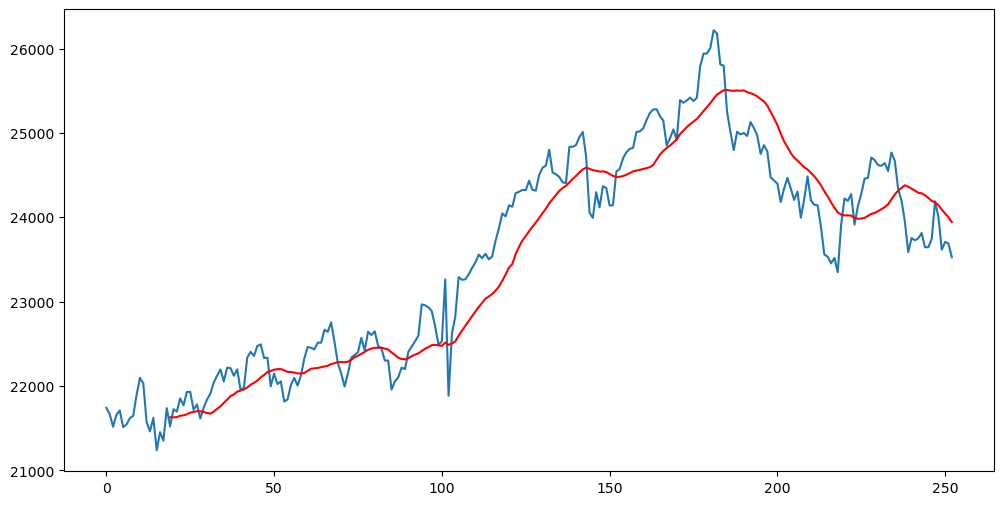

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma20,'r')

In [8]:
ma4 = df.Close.rolling(4).mean()
ma4
ma8 = df.Close.rolling(8).mean()
ma8
ma14= df.Close.rolling(14).mean()
ma14


Ticker,^NSEI
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
248,23929.500000
249,23854.342913
250,23809.478655
251,23773.057199


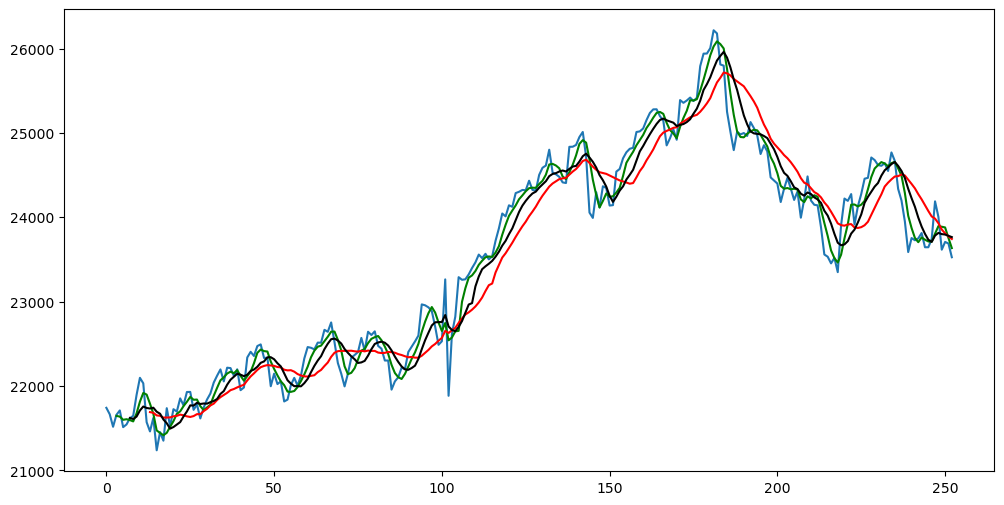

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma4,'g')
plt.plot(ma14,'r')
plt.plot(ma8,'black')

In [10]:
df.shape

(253, 5)

In [11]:
#Splitting data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(177, 1)
(76, 1)


In [12]:
data_training.head()

Ticker,^NSEI
0,21741.900391
1,21665.800781
2,21517.349609
3,21658.599609
4,21710.800781


In [13]:
data_testing.head()

Ticker,^NSEI
177,25790.949219
178,25939.050781
179,25940.400391
180,26004.150391
181,26216.050781


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.12036596],
       [0.10215922],
       [0.06664246],
       [0.10043635],
       [0.11292541],
       [0.06560182],
       [0.0732218 ],
       [0.09089023],
       [0.09770882],
       [0.15688737],
       [0.20543057],
       [0.18984389],
       [0.07970535],
       [0.05345995],
       [0.09177573],
       [0.        ],
       [0.051474  ],
       [0.02722623],
       [0.119337  ],
       [0.06777889],
       [0.11648985],
       [0.10973107],
       [0.14713799],
       [0.12749529],
       [0.1652251 ],
       [0.16548818],
       [0.11463567],
       [0.13007936],
       [0.09025659],
       [0.12068885],
       [0.14384832],
       [0.16076302],
       [0.19185321],
       [0.21136413],
       [0.22923582],
       [0.1952868 ],
       [0.23414042],
       [0.23300399],
       [0.21131647],
       [0.22957087],
       [0.17042876],
       [0.17800108],
       [0.26316149],
       [0.27915517],
       [0.26736049],
       [0.29553203],
       [0.30019738],
       [0.261

In [20]:
import numpy as np
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
#ML model
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [22]:
from pickle import TRUE
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu',return_sequences=True))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100, 120)       │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100, 120)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100, 1)         │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.5781
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.5135
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.4336
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.2175
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.2022
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.1017
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.1163
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.1000
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0815
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0805
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0811
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0719
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0709
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0725
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0694
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━

In [25]:
model.save('keras_model.h5')

In [26]:
data_testing.head()

Ticker,^NSEI
177,25790.949219
178,25939.050781
179,25940.400391
180,26004.150391
181,26216.050781


In [27]:
data_training.tail()

Ticker,^NSEI
172,25356.500000
173,25383.750000
174,25418.550781
175,25377.550781
176,25415.800781


In [28]:
past_100_days = data_training.tail(100)

In [29]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [30]:
final_df.head()

Ticker,^NSEI
0,22419.949219
1,22643.400391
2,22604.849609
3,22648.199219
4,22475.849609


In [31]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.12361605],
       [0.17520293],
       [0.16630294],
       [0.17631081],
       [0.13652145],
       [0.12886822],
       [0.09650124],
       [0.09650124],
       [0.01685309],
       [0.03940834],
       [0.05068642],
       [0.07695849],
       [0.07296481],
       [0.11989923],
       [0.13427053],
       [0.1488037 ],
       [0.16467561],
       [0.25006065],
       [0.24762485],
       [0.24193396],
       [0.23170694],
       [0.18935464],
       [0.1394767 ],
       [0.14918426],
       [0.31845417],
       [0.        ],
       [0.16988133],
       [0.21629676],
       [0.32451435],
       [0.31736883],
       [0.31867331],
       [0.33208643],
       [0.34962083],
       [0.36501929],
       [0.38632824],
       [0.37665494],
       [0.38842901],
       [0.37321497],
       [0.38169923],
       [0.42405154],
       [0.45810401],
       [0.49866667],
       [0.49084028],
       [0.5211642 ],
       [0.51698565],
       [0.55453581],
       [0.55814892],
       [0.563

In [32]:
input_data.shape

(176, 1)

In [33]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])


In [34]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(76, 100, 1)
(76,)


In [35]:
#Making Predictions

y_predicted = model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


In [36]:
y_predicted.shape

(76, 100, 1)

In [37]:
y_test

array([0.90185927, 0.93605062, 0.93636219, 0.95107979, 1.        ,
       0.99143458, 0.90645356, 0.90323318, 0.77699646, 0.72262794,
       0.6721034 , 0.72229337, 0.71509013, 0.71889939, 0.71100402,
       0.7487963 , 0.73249738, 0.71263179, 0.66150664, 0.68556296,
       0.66872115, 0.59738411, 0.58893457, 0.58060046, 0.53013364,
       0.5666909 , 0.59617207, 0.56708318, 0.53580109, 0.55865664,
       0.4873196 , 0.53763673, 0.60014321, 0.5344159 , 0.52260711,
       0.5210145 , 0.46148581, 0.38659382, 0.38051019, 0.36229537,
       0.3772321 , 0.33830849, 0.46698056, 0.53962207, 0.5332963 ,
       0.55185787, 0.46857361, 0.51865942, 0.55212345, 0.59393287,
       0.5963105 , 0.6519375 , 0.64487315, 0.63129815, 0.6292321 ,
       0.63656204, 0.61506822, 0.66576636, 0.64266821, 0.56596358,
       0.53430047, 0.47724229, 0.39316173, 0.43147346, 0.42551744,
       0.43072316, 0.44531404, 0.40641343, 0.40639043, 0.42903812,
       0.53194583, 0.48948982, 0.39975308, 0.42095787, 0.41658

In [38]:
y_predicted

array([[[0.14601299],
        [0.24342826],
        [0.33465356],
        ...,
        [0.72686535],
        [0.72710425],
        [0.72735214]],

       [[0.14597678],
        [0.24332747],
        [0.33446836],
        ...,
        [0.72710425],
        [0.7273522 ],
        [0.72761494]],

       [[0.14598247],
        [0.24333689],
        [0.33450687],
        ...,
        [0.72735214],
        [0.72761494],
        [0.7279025 ]],

       ...,

       [[0.14591491],
        [0.24307096],
        [0.3338339 ],
        ...,
        [0.7227207 ],
        [0.7224983 ],
        [0.7222844 ]],

       [[0.14591476],
        [0.24305758],
        [0.33379263],
        ...,
        [0.7224983 ],
        [0.7222844 ],
        [0.7220844 ]],

       [[0.14590243],
        [0.24301746],
        [0.33370912],
        ...,
        [0.7222844 ],
        [0.72208446],
        [0.7219009 ]]], dtype=float32)

In [39]:
scaler.scale_

array([0.00023086])

In [40]:
scale_factor = 1/0.02099517
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

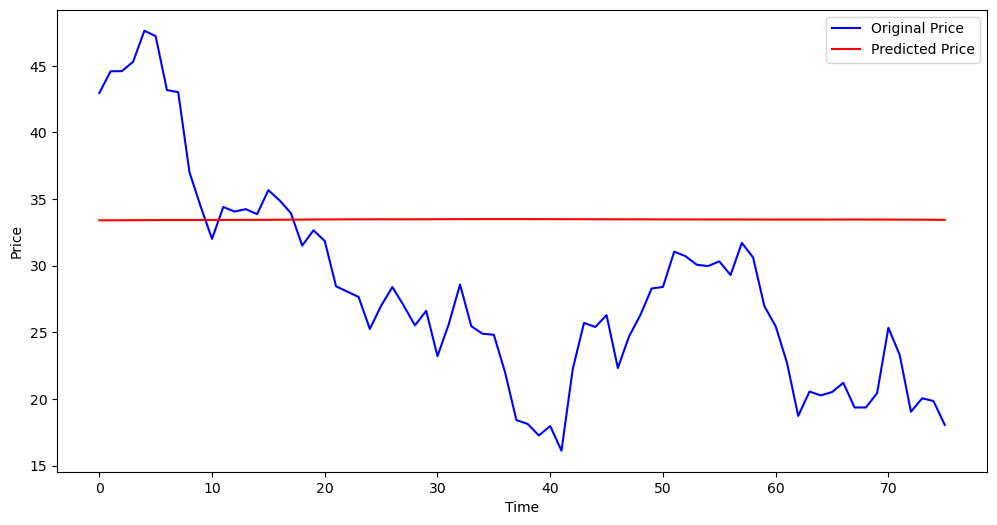

In [48]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [41]:
print(f"y_test shape: {y_test.shape}")
print(f"y_predicted shape: {y_predicted.shape}")


y_test shape: (76,)
y_predicted shape: (76, 100, 1)


In [42]:
y_predicted = y_predicted.squeeze()
print(f"After squeeze: {y_predicted.shape}")  # Should be (76, 100)


After squeeze: (76, 100)


In [43]:
y_predicted = y_predicted.mean(axis=1)
print(f"After mean reduction: {y_predicted.shape}")  # Should be (76,)


After mean reduction: (76,)


In [44]:
print(f"y_test shape: {y_test.shape}")
print(f"y_predicted shape: {y_predicted.shape}")


y_test shape: (76,)
y_predicted shape: (76,)


In [45]:
print("Predicted values (y_predicted):", y_predicted[:10])  # Print a few predictions


Predicted values (y_predicted): [33.402683 33.40489  33.408657 33.412434 33.416725 33.42009  33.42329
 33.42568  33.42848  33.429306]


In [46]:
print("x_test sample:", x_test[:5])
print("x_train sample:", x_train[:5])


x_test sample: [[[0.12361605]
  [0.17520293]
  [0.16630294]
  [0.17631081]
  [0.13652145]
  [0.12886822]
  [0.09650124]
  [0.09650124]
  [0.01685309]
  [0.03940834]
  [0.05068642]
  [0.07695849]
  [0.07296481]
  [0.11989923]
  [0.13427053]
  [0.1488037 ]
  [0.16467561]
  [0.25006065]
  [0.24762485]
  [0.24193396]
  [0.23170694]
  [0.18935464]
  [0.1394767 ]
  [0.14918426]
  [0.31845417]
  [0.        ]
  [0.16988133]
  [0.21629676]
  [0.32451435]
  [0.31736883]
  [0.31867331]
  [0.33208643]
  [0.34962083]
  [0.36501929]
  [0.38632824]
  [0.37665494]
  [0.38842901]
  [0.37321497]
  [0.38169923]
  [0.42405154]
  [0.45810401]
  [0.49866667]
  [0.49084028]
  [0.5211642 ]
  [0.51698565]
  [0.55453581]
  [0.55814892]
  [0.56315849]
  [0.56239691]
  [0.5884034 ]
  [0.56329692]
  [0.56133458]
  [0.60432176]
  [0.62384106]
  [0.62991297]
  [0.67328072]
  [0.61095911]
  [0.60596081]
  [0.59898889]
  [0.58385556]
  [0.58214707]
  [0.6811301 ]
  [0.68141868]
  [0.68631327]
  [0.70797978]
  [0.72177

In [47]:
y_predicted = scaler.inverse_transform(y_predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).squeeze()


ValueError: Expected 2D array, got 1D array instead:
array=[33.402683 33.40489  33.408657 33.412434 33.416725 33.42009  33.42329
 33.42568  33.42848  33.429306 33.43055  33.431656 33.43346  33.435078
 33.438496 33.442375 33.446598 33.45117  33.45731  33.463097 33.468437
 33.47327  33.47674  33.47818  33.479443 33.484486 33.47954  33.480133
 33.481335 33.484154 33.486515 33.488495 33.4902   33.491566 33.492706
 33.493595 33.49384  33.493828 33.49311  33.491806 33.49007  33.488426
 33.487072 33.4853   33.483738 33.48176  33.480297 33.478745 33.477062
 33.475113 33.473476 33.471283 33.468765 33.467003 33.465736 33.464787
 33.46497  33.46409  33.46306  33.46171  33.460026 33.45816  33.457844
 33.45764  33.458294 33.460003 33.462387 33.463493 33.461296 33.458668
 33.457012 33.454098 33.45171  33.44872  33.44451  33.439804].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.